In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
df = df.drop_duplicates()

X = df.drop("purchaseValue",axis=1)
Y = df["purchaseValue"]

In [3]:
X_predict = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

In [4]:
print(list(X.columns))

['trafficSource.isTrueDirect', 'browser', 'device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'userId', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'locationCountry', 'device.browserSize', 'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType', 'geoNetwork.city', 'trafficSource.adwordsClickInfo.page', 'geoNetwork.metro', 'pageViews', 'locationZone', 'device.mobileDeviceModel', 'trafficSource.referralPath', 'totals.bounces', 'date', 'device.language', 'deviceType', 'userChann

In [5]:
not_available_in_demo = ['device.screenResolution','device.mobileDeviceBranding','device.mobileInputSelector','device.mobileDeviceMarketingName',
                         'device.operatingSystemVersion','device.flashVersion','geoNetwork.networkLocation','browserMajor','device.browserSize',
                         'device.mobileDeviceModel','device.language','device.browserVersion','device.screenColors']
pk = ['userId','sessionId']
single_value = ['screenSize','totals.visits','socialEngagementType','locationZone']

categorical = ['browser','geoCluster','trafficSource.adwordsClickInfo.slot','geoNetwork.networkDomain','os','geoNetwork.subContinent',
               'trafficSource.medium','trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.page','deviceType','userChannel'
               ,'geoNetwork.continent']
too_much_categorical = ['geoNetwork.region','trafficSource','locationCountry','geoNetwork.city','geoNetwork.metro','trafficSource.referralPath']
numerical = ['pageViews','totalHits','sessionNumber']
boolean = ['trafficSource.isTrueDirect','gclIdPresent','trafficSource.adwordsClickInfo.isVideoAd','totals.bounces','device.isMobile']
textual = ['trafficSource.adContent','trafficSource.keyword','trafficSource.campaign']
date = ['date']

In [6]:
# print(sorted(list(df['purchaseValue'].value_counts().keys())))

In [7]:
X_predict['trafficSource'].value_counts()

trafficSource
google                    11112
(direct)                   9247
youtube.com                4737
mall.googleplex.com        1536
analytics.google.com        504
                          ...  
googleux.perksplus.com        1
google.es                     1
google.hu                     1
google.ca                     1
au.search.yahoo.com           1
Name: count, Length: 91, dtype: int64

In [8]:
print(df[['date','sessionStart']])

            date  sessionStart
0       20170714    1500100799
1       20170519    1495262065
2       20171020    1508510328
3       20170103    1483431838
4       20161006    1475804633
...          ...           ...
116018  20170717    1500318402
116019  20161108    1478624150
116020  20160805    1470384216
116021  20171002    1506953297
116022  20170730    1501474532

[115787 rows x 2 columns]


In [9]:
print(df.shape)

(115787, 52)


In [10]:
print(df['new_visits'].value_counts())

new_visits
1.0    80395
Name: count, dtype: int64


In [11]:
print(df[df['new_visits']!=1.0]['purchaseValue'].mean()-df[df['new_visits']==1.0]['purchaseValue'].mean())

54762764.120745584


In [12]:
print(df[['geoNetwork.continent','geoNetwork.subContinent']].value_counts())

geoNetwork.continent  geoNetwork.subContinent
Americas              Northern America           63397
Asia                  Southeast Asia              7143
                      Southern Asia               6482
Europe                Western Europe              6262
                      Northern Europe             5996
Asia                  Eastern Asia                5035
Americas              South America               4328
Europe                Eastern Europe              4275
                      Southern Europe             3754
Asia                  Western Asia                3578
Americas              Central America             1673
Oceania               Australasia                 1586
Africa                Northern Africa              928
                      Western Africa               314
                      Southern Africa              264
Americas              Caribbean                    248
Africa                Eastern Africa               193
(not set)          

In [13]:
print(df[df['totals.bounces']==1.0]['purchaseValue'].value_counts())

purchaseValue
0.0    47121
Name: count, dtype: int64


In [14]:
req_cols = categorical+too_much_categorical+numerical+boolean+textual+date+['sessionStart']
X = X[req_cols]
X_predict = X_predict[req_cols]

In [15]:
# df['trafficSource.adwordsClickInfo.page'].value_counts()
# X['tfsrcinfopage1'] = (X['trafficSource.adwordsClickInfo.page']==1).astype(int)
# X['tfsrcinfopage0'] = (X['trafficSource.adwordsClickInfo.page'].isna()).astype(int)
# X_predict['tfsrcinfopage1'] = (X_predict['trafficSource.adwordsClickInfo.page']==1).astype(int)
# X_predict['tfsrcinfopage0'] = (X_predict['trafficSource.adwordsClickInfo.page'].isna()).astype(int)

In [16]:
X.shape

(115787, 31)

In [17]:
X_predict.shape

(29006, 31)

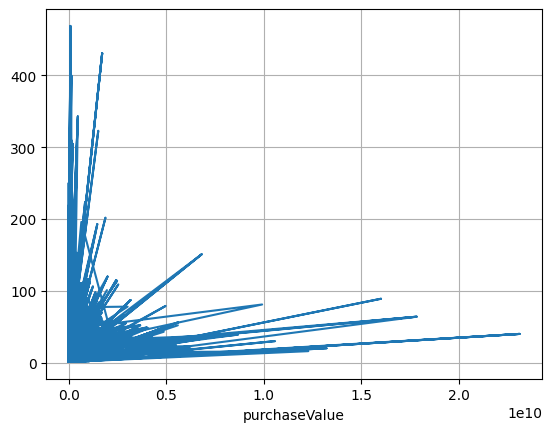

In [18]:
import matplotlib.pyplot as plt

plt.plot(df['purchaseValue'],df['pageViews'])
plt.xlabel('purchaseValue')
plt.grid(True)
plt.show()


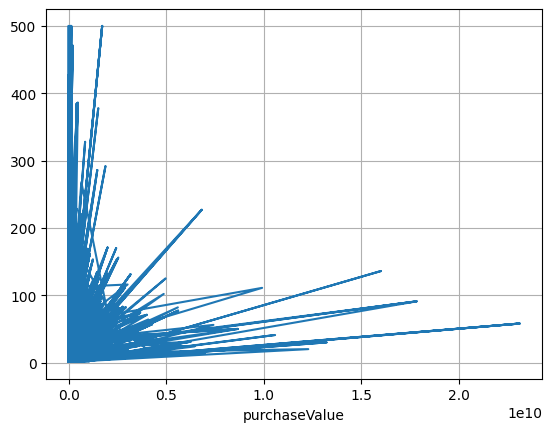

In [19]:
plt.plot(df['purchaseValue'],df['totalHits'])
plt.xlabel('purchaseValue')
plt.grid(True)
plt.show()

In [20]:
X['date'] = pd.to_datetime(X['date'], format='%Y%m%d')
X_predict['date'] = pd.to_datetime(X_predict['date'], format='%Y%m%d')

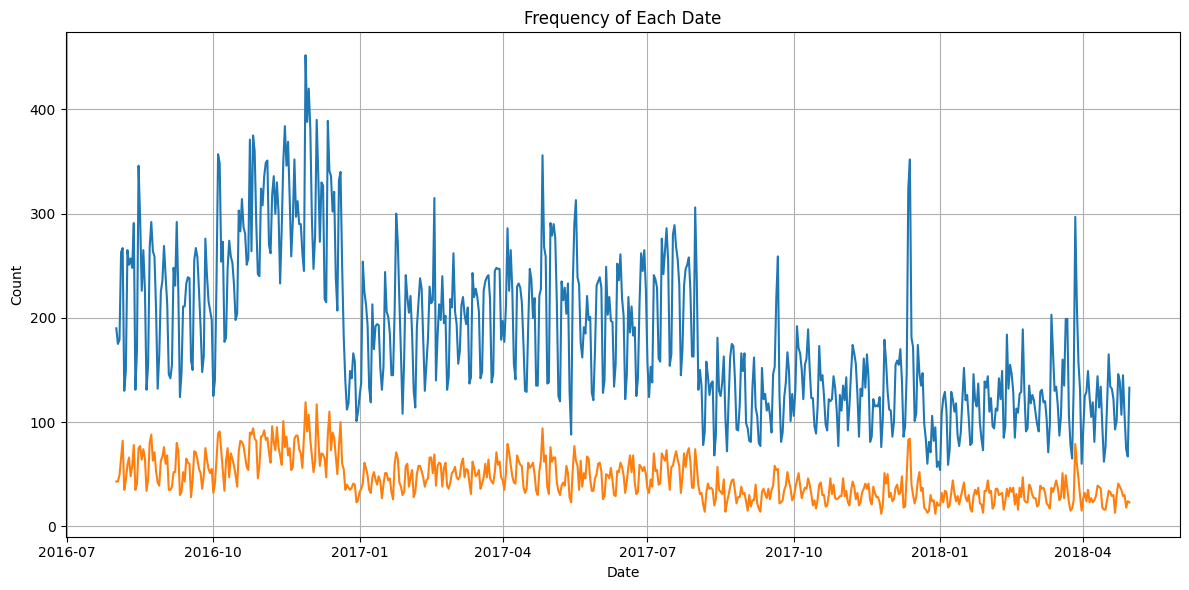

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
date_counts1 = X['date'].value_counts().sort_index()
date_counts2 = X_predict['date'].value_counts().sort_index()

plt.plot(date_counts1.index, date_counts1.values, label='train')
plt.plot(date_counts2.index, date_counts2.values, label='predict')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Frequency of Each Date')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
for elem in [X,X_predict]:
    elem['year'] = elem['date'].dt.year
    elem['month'] = elem['date'].dt.month
    elem['dayofweek'] = elem['date'].dt.dayofweek
    elem['is_weekend'] = elem['dayofweek'] >= 5
    elem.drop(['date'],inplace=True,axis=1)
    elem['dow_sin'] = np.sin(2 * np.pi * elem['dayofweek'] / 7)
    elem['dow_cos'] = np.cos(2 * np.pi * elem['dayofweek'] / 7)
    elem['month_sin'] = np.sin(2 * np.pi * elem['month'] / 12)
    elem['month_cos'] = np.cos(2 * np.pi * elem['month'] / 12)
    
date.clear()
date = ['year','month','is_weekend']
numerical += date
categorical += ['dayofweek']
date.clear()

In [23]:
print(X['year'].value_counts())

year
2017    62770
2016    38707
2018    14310
Name: count, dtype: int64


In [24]:
pd.to_datetime(X['sessionStart'],unit='s')

0        2017-07-15 06:39:59
1        2017-05-20 06:34:25
2        2017-10-20 14:38:48
3        2017-01-03 08:23:58
4        2016-10-07 01:43:53
                 ...        
116018   2017-07-17 19:06:42
116019   2016-11-08 16:55:50
116020   2016-08-05 08:03:36
116021   2017-10-02 14:08:17
116022   2017-07-31 04:15:32
Name: sessionStart, Length: 115787, dtype: datetime64[ns]

In [25]:
for elem in [X,X_predict]:
    elem['sessionStart'] = pd.to_datetime(elem['sessionStart'], unit='s')
    elem['hour_session'] = elem['sessionStart'].dt.hour # ise one hot encode kr lunga
    elem['dayofweek_session'] = elem['sessionStart'].dt.dayofweek
    elem['is_weekend_session'] = elem['dayofweek_session'].isin([5, 6]).astype(int)
    elem['isnight_session'] = elem['hour_session'].apply(lambda h: 1 if h < 6 or h >= 22 else 0)
    elem['hour_sin'] = np.sin(2 * np.pi * elem['hour_session'] / 24)
    elem['hour_cos'] = np.cos(2 * np.pi * elem['hour_session'] / 24)
    elem['is_weekend_night_session'] = elem['is_weekend_session']*elem['isnight_session']
    elem['dow_sin_session'] = np.sin(2 * np.pi * elem['dayofweek_session'] / 7)
    elem['dow_cos_session'] = np.cos(2 * np.pi * elem['dayofweek_session'] / 7)
    elem = elem.drop(['sessionStart'],axis=1)

In [26]:
print(X.columns)

Index(['browser', 'geoCluster', 'trafficSource.adwordsClickInfo.slot',
       'geoNetwork.networkDomain', 'os', 'geoNetwork.subContinent',
       'trafficSource.medium', 'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.page', 'deviceType', 'userChannel',
       'geoNetwork.continent', 'geoNetwork.region', 'trafficSource',
       'locationCountry', 'geoNetwork.city', 'geoNetwork.metro',
       'trafficSource.referralPath', 'pageViews', 'totalHits', 'sessionNumber',
       'trafficSource.isTrueDirect', 'gclIdPresent',
       'trafficSource.adwordsClickInfo.isVideoAd', 'totals.bounces',
       'device.isMobile', 'trafficSource.adContent', 'trafficSource.keyword',
       'trafficSource.campaign', 'sessionStart', 'year', 'month', 'dayofweek',
       'is_weekend', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos',
       'hour_session', 'dayofweek_session', 'is_weekend_session',
       'isnight_session', 'hour_sin', 'hour_cos', 'is_weekend_night_session',
 

In [27]:
d1 = (X['browser'].value_counts())
d2 = (X_predict['browser'].value_counts())
d1 = dict(d1)
d2 = dict(d2)
for i in d1:
    if i not in d2:
        X['browser'] = X['browser'].replace(i,'(not set)')

for i in d2:
    if i not in d1:
        X_predict['browser'] = X_predict['browser'].replace(i,'(not set)')

In [28]:
d1 = (X['os'].value_counts())
d2 = (X_predict['os'].value_counts())
d1 = dict(d1)
d2 = dict(d2)
for i in d1:
    if i not in d2:
        X['os'] = X['os'].replace(i,'(not set)')

for i in d2:
    if i not in d1:
        X_predict['os'] = X_predict['os'].replace(i,'(not set)')

In [29]:
# d1 = (X['trafficSource'].value_counts())
# d2 = (X_predict['trafficSource'].value_counts())
# d1 = dict(d1)
# d2 = dict(d2)
# for i in d1:
#     if i not in d2:
#         X['trafficSource'] = X['trafficSource'].replace(i,'(not set)')

# for i in d2:
#     if i not in d1:
#         X_predict['trafficSource'] = X_predict['trafficSource'].replace(i,'(not set)')

In [30]:
# pattern = r"\{KeyWord:(.*?)\}"
# X['trafficSource.adContent'] = X['trafficSource.adContent'].astype(str).str.replace(pattern, r"\1", regex=True)
# X_predict['trafficSource.adContent'] = X_predict['trafficSource.adContent'].astype(str).str.replace(pattern, r"\1", regex=True)

In [31]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(max_features=100)
# X_tfidf = tfidf.fit_transform(X['trafficSource.adContent'])

# tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=[f"tfidf_{word}" for word in tfidf.get_feature_names_out()])
# X = pd.concat([X.drop(columns=['trafficSource.adContent']).reset_index(drop=True),tfidf_df.reset_index(drop=True)], axis=1)

# X_tfidf = tfidf.transform(X_predict['trafficSource.adContent'])
# tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=[f"tfidf_{word}" for word in tfidf.get_feature_names_out()])
# X_predict = pd.concat([X_predict.drop(columns=['trafficSource.adContent']).reset_index(drop=True),tfidf_df.reset_index(drop=True)], axis=1)

In [32]:
X['pageViews'] = X['pageViews'].fillna(X['pageViews'].mean())
X_predict['pageViews'] = X_predict['pageViews'].fillna(X['pageViews'].mean())

In [33]:
X['trafficSource.adwordsClickInfo.adNetworkType'] = X['trafficSource.adwordsClickInfo.adNetworkType'].fillna('not set')
X_predict['trafficSource.adwordsClickInfo.adNetworkType'] = X_predict['trafficSource.adwordsClickInfo.adNetworkType'].fillna('not set')

In [34]:
X['trafficSource.adwordsClickInfo.slot'] = X['trafficSource.adwordsClickInfo.slot'].fillna('unknown')
X_predict['trafficSource.adwordsClickInfo.slot'] = X_predict['trafficSource.adwordsClickInfo.slot'].fillna('unknown')
X['trafficSource.adwordsClickInfo.slot'] = X['trafficSource.adwordsClickInfo.slot'].replace('Google Display Network','unknown')

In [35]:
X['trafficSource.isTrueDirect'] = X['trafficSource.isTrueDirect'].fillna(0)
X['trafficSource.isTrueDirect'] = X['trafficSource.isTrueDirect'].replace(True,1)
X['trafficSource.isTrueDirect'] = X['trafficSource.isTrueDirect'].astype(int)

X_predict['trafficSource.isTrueDirect'] = X_predict['trafficSource.isTrueDirect'].fillna(0)
X_predict['trafficSource.isTrueDirect'] = X_predict['trafficSource.isTrueDirect'].replace(True,1)
X_predict['trafficSource.isTrueDirect'] = X_predict['trafficSource.isTrueDirect'].astype(int)

/tmp/ipykernel_31/2167355588.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['trafficSource.isTrueDirect'] = X['trafficSource.isTrueDirect'].replace(True,1)
/tmp/ipykernel_31/2167355588.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_predict['trafficSource.isTrueDirect'] = X_predict['trafficSource.isTrueDirect'].replace(True,1)


In [36]:
X['device.isMobile'] = X['device.isMobile'].replace(False,0)
X['device.isMobile'] = X['device.isMobile'].replace(True,1)
X['device.isMobile'] = X['device.isMobile'].astype(int)

X_predict['device.isMobile'] = X_predict['device.isMobile'].replace(False,0)
X_predict['device.isMobile'] = X_predict['device.isMobile'].replace(True,1)
X_predict['device.isMobile'] = X_predict['device.isMobile'].astype(int)

/tmp/ipykernel_31/1181391405.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['device.isMobile'] = X['device.isMobile'].replace(True,1)
/tmp/ipykernel_31/1181391405.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_predict['device.isMobile'] = X_predict['device.isMobile'].replace(True,1)


In [37]:
X['trafficSource.adwordsClickInfo.isVideoAd'] = X['trafficSource.adwordsClickInfo.isVideoAd'].fillna(1)
X['trafficSource.adwordsClickInfo.isVideoAd'] = X['trafficSource.adwordsClickInfo.isVideoAd'].replace(False,0)
X['trafficSource.adwordsClickInfo.isVideoAd'] = X['trafficSource.adwordsClickInfo.isVideoAd'].astype(int)

X_predict['trafficSource.adwordsClickInfo.isVideoAd'] = X_predict['trafficSource.adwordsClickInfo.isVideoAd'].fillna(1)
X_predict['trafficSource.adwordsClickInfo.isVideoAd'] = X_predict['trafficSource.adwordsClickInfo.isVideoAd'].replace(False,0)
X_predict['trafficSource.adwordsClickInfo.isVideoAd'] = X_predict['trafficSource.adwordsClickInfo.isVideoAd'].astype(int)

/tmp/ipykernel_31/2983323809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['trafficSource.adwordsClickInfo.isVideoAd'] = X['trafficSource.adwordsClickInfo.isVideoAd'].replace(False,0)
/tmp/ipykernel_31/2983323809.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_predict['trafficSource.adwordsClickInfo.isVideoAd'] = X_predict['trafficSource.adwordsClickInfo.isVideoAd'].replace(False,0)


In [38]:
X['geoNetwork.region'].value_counts()

geoNetwork.region
not available in demo dataset    60021
California                       18064
New York                          5619
(not set)                         2804
Illinois                          1622
                                 ...  
Djong Thap Province                  1
Krasnodar Krai                       1
Overijssel                           1
Sardinia                             1
Puebla                               1
Name: count, Length: 388, dtype: int64

In [39]:
X_predict['geoNetwork.region'].value_counts()

geoNetwork.region
not available in demo dataset    14991
California                        4467
New York                          1499
(not set)                          696
Illinois                           441
                                 ...  
Corsica                              1
State of Pernambuco                  1
State of Espirito Santo              1
Miaoli County                        1
Alaska                               1
Name: count, Length: 287, dtype: int64

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115787 entries, 0 to 116022
Data columns (total 47 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   browser                                       115787 non-null  object        
 1   geoCluster                                    115787 non-null  object        
 2   trafficSource.adwordsClickInfo.slot           115787 non-null  object        
 3   geoNetwork.networkDomain                      115787 non-null  object        
 4   os                                            115787 non-null  object        
 5   geoNetwork.subContinent                       115787 non-null  object        
 6   trafficSource.medium                          115787 non-null  object        
 7   trafficSource.adwordsClickInfo.adNetworkType  115787 non-null  object        
 8   trafficSource.adwordsClickInfo.page           4269 non-null

In [41]:
onehot = ['browser','geoCluster','os','userChannel','deviceType','dayofweek','geoNetwork.subContinent',
          'trafficSource.medium','trafficSource.adwordsClickInfo.adNetworkType','geoNetwork.networkDomain'
          ,'trafficSource.adwordsClickInfo.slot','locationCountry','dayofweek_session'] 

numerical = ['pageViews', 'totalHits', 'year', 'month', 'is_weekend','trafficSource.isTrueDirect',
             'gclIdPresent','device.isMobile','trafficSource.adwordsClickInfo.isVideoAd','sessionNumber',
             'isnight_session','is_weekend_session','month_sin','month_cos','dow_sin','dow_cos','hour_sin','hour_cos','is_weekend_night_session'
            ,'dow_sin_session','dow_cos_session']

d = {'totals.bounces':1.0,'trafficSource.adwordsClickInfo.page':[2.0,3.0,4.0,5.0]}  

In [42]:
from sklearn.model_selection import train_test_split
submit = True
if submit:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.00000861898,random_state=1000)
    X_train,Y_train = X,Y
else:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.06,random_state=42)

In [43]:
X_train[onehot+numerical].shape

(115787, 34)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import ExtraTreesRegressor

condition = (X_train['totals.bounces'] == 1.0) | (X_train['trafficSource.adwordsClickInfo.page'].isin([2.0, 3.0, 4.0, 5.0]))

numpipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), onehot),
        ('num', numpipeline, numerical)
    ],
    remainder='passthrough'
)

# i could try chaging the value of k in select k best.
model = Pipeline(steps=[
    ('preprocessing', preprocessor),    
    ('select', SelectKBest(f_regression, k=30)),
    # ('regressor', HistGradientBoostingRegressor()) # 0.11,0.36
    # ('regressor',lgb.LGBMRegressor(n_estimators=1000,learning_rate=0.05,max_depth=7,random_state=42)) # 0.25,0.46
    # ('regressor',DecisionTreeRegressor(max_depth=9,min_samples_split=10,min_samples_leaf=5,max_leaf_nodes=31 )) # this has weird score, look into it
    # ('regressor',RandomForestRegressor(n_estimators=100, random_state=42)) # 0.575 test score, sus, but gotta try submitting it 
    # ('regressor',LGBMRegressor(n_estimators=20000,learning_rate=0.06,max_depth=None,num_leaves=127,colsample_bytree=0.7,subsample=0.7,random_state=42,n_jobs=-1)) # lowered the training, but same test
    # ('regressor',RandomForestRegressor(n_estimators=2500,max_depth=None,min_samples_split=2,min_samples_leaf=1,max_features=0.5,bootstrap=True,n_jobs=-1, random_state=42)) # 0.41,0.576
    ('regressor', ExtraTreesRegressor(n_estimators=900,max_features=0.8,min_samples_split=2,min_samples_leaf=1, bootstrap=False,n_jobs=-1,random_state=42,verbose=1))
    # ('regressor',XGBRegressor(n_estimators=3853,learning_rate=0.11495493205167782,max_depth=9,colsample_bytree=0.5115312125207079,subsample=0.6163856702151521,reg_lambda=0.9737555188414592,reg_alpha=0.04666566321361543))
    # ('regressor', XGBRegressor(n_estimators=3000,learning_rate=0.05,max_depth=7,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.1,reg_lambda=1.0, n_jobs=-1,random_state=42,verbosity=1))
])
# param_distributions = {
#     'regressor__n_estimators': randint(100, 4000),
#     'regressor__max_depth': randint(3, 10),
#     'regressor__learning_rate': uniform(0.01, 0.2),
#     'regressor__subsample': uniform(0.5, 0.5),
#     'regressor__colsample_bytree': uniform(0.5, 0.5),
#     'regressor__reg_alpha': uniform(0, 1),
#     'regressor__reg_lambda': uniform(0, 1),
# }

# cvmodel = RandomizedSearchCV(model,param_distributions=param_distributions,n_iter=5,cv=3,scoring='r2',verbose=2,random_state=54,n_jobs=-1)

# cvmodel.fit(X_train[onehot+numerical],Y_train)

# model = cvmodel

model.fit(X_train[~condition][onehot+numerical],Y_train[~condition])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.2min finished


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['browser', 'geoCluster',
                                                   'os', 'userChannel',
                                                   'deviceType', 'dayofweek',
                                                   'geoNetwork.subContinent',
                                                   'trafficSource.medium',
                                                   'trafficSource.adwordsClickInfo.adNetworkType',
                                                   'geoNetwork.networkDomain',
                                                   'tra...
                                                   'isnight_session',
                                                   'is_weekend_session',
                                                   'month_sin', 'month_cos',
                                                   'dow_sin', 'dow_cos',
                                                   'hour_sin', 'hour_cos',
                                                   'is_weekend_night_session',
                                                   'dow_sin_session',
                                                   'dow_cos_session'])])),
                ('select',
                 SelectKBest(k=30,
                             score_func=<function f_regression at 0x7e19fb3e60c0>)),
                ('regressor',
                 ExtraTreesRegressor(max_features=0.8, n_estimators=800,
                                     n_jobs=-1, random_state=42, verbose=1))])

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,MaxAbsScaler

numpipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
    # ('scaler',MaxAbsScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), onehot),
        ('num', numpipeline, numerical)
    ],
    remainder='passthrough'
)

model1 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    # ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=30)),
    # ('classifier',XGBClassifier(n_estimators=2000,learning_rate=0.05,max_depth=7,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.1,reg_lambda=1.0,use_label_encoder=False,n_jobs=-1,random_state=42))
    # ('classifier', RandomForestClassifier(n_estimators=1000,max_depth=None,max_features='sqrt',min_samples_split=2,min_samples_leaf=1,bootstrap=True,n_jobs=-1,random_state=42))
    ('classifier',LGBMClassifier(n_estimators=1500,learning_rate=0.05,max_depth=9,num_leaves=31,subsample=0.5,colsample_bytree=0.8,random_state=42,n_jobs=-1))
    # ('classifier',LGBMClassifier(random_state=42, n_jobs=-1))
    # ('classifier',XGBClassifier(n_estimators=1000,learning_rate=0.05,max_depth=7,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.1,reg_lambda=1.0,use_label_encoder=False,eval_metric='logloss',random_state=42,n_jobs=-1))
    # ('classifier',ExtraTreesClassifier(n_estimators=2500,max_features='sqrt',max_depth=30,min_samples_split=2,min_samples_leaf=1,bootstrap=False,n_jobs=-1,random_state=42,verbose=1))
])

# param_dist = {
#     'classifier__n_estimators': randint(300, 2000),
#     'classifier__learning_rate': uniform(0.01, 0.2),
#     'classifier__max_depth': randint(3, 15),
#     'classifier__num_leaves': randint(20, 150),
#     'classifier__subsample': uniform(0.6, 0.4),
#     'classifier__colsample_bytree': uniform(0.6, 0.4),
#     'classifier__reg_alpha': uniform(0.0, 1.0),
#     'classifier__reg_lambda': uniform(0.0, 1.0)
# }

# search = RandomizedSearchCV(
#     model1,
#     param_distributions=param_dist,
#     n_iter=5,
#     cv=3,
#     scoring='accuracy',
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# search.fit(X_train[onehot+numerical],(Y_train!=0).astype(int))
# print("Best score:", search.best_score_)
# print("Best params:", search.best_params_)
# model1 = search
model1.fit(X_train[onehot+numerical],(Y_train!=0).astype(int))

[LightGBM] [Info] Number of positive: 23797, number of negative: 91990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16292
[LightGBM] [Info] Number of data points in the train set: 115787, number of used features: 447
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205524 -> initscore=-1.352120
[LightGBM] [Info] Start training from score -1.352120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['browser', 'geoCluster',
                                                   'os', 'userChannel',
                                                   'deviceType', 'dayofweek',
                                                   'geoNetwork.subContinent',
                                                   'trafficSource.medium',
                                                   'trafficSource.adwordsClickInfo.adNetworkType',
                                                   'geoNetwork.networkDomain',
                                                   'tra...
                                                   'trafficSource.adwordsClickInfo.isVideoAd',
                                                   'sessionNumber',
                                                   'isnight_session',
                                                   'is_weekend_session',
                                                   'month_sin', 'month_cos',
                                                   'dow_sin', 'dow_cos',
                                                   'hour_sin', 'hour_cos',
                                                   'is_weekend_night_session',
                                                   'dow_sin_session',
                                                   'dow_cos_session'])])),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05,
                                max_depth=9, n_estimators=1500, n_jobs=-1,
                                random_state=42, subsample=0.5))])

In [46]:
Y_test_pred = model.predict(X_test[onehot+numerical])
class_test_pred = model1.predict(X_test[onehot+numerical])
Y_test_pred = Y_test_pred * (class_test_pred)
condition = (X_test['totals.bounces'] == 1.0) | (X_test['trafficSource.adwordsClickInfo.page'].isin([2.0, 3.0, 4.0, 5.0]))
Y_test_pred[condition.to_numpy()] = 0
Y_test_pred = np.maximum(Y_test_pred,0)

Y_train_pred = model.predict(X_train[onehot+numerical])
class_train_pred = model1.predict(X_train[onehot+numerical])
Y_train_pred = Y_train_pred * (class_train_pred)
condition = (X_train['totals.bounces'] == 1.0) | (X_train['trafficSource.adwordsClickInfo.page'].isin([2.0, 3.0, 4.0, 5.0]))
Y_train_pred[condition.to_numpy()] = 0
Y_train_pred = np.maximum(Y_train_pred, 0)

from sklearn.metrics import r2_score
print(r2_score(Y_train,Y_train_pred))
print(r2_score(Y_test,Y_test_pred))

# 0.9983523793372052
# 0.9378756605775351

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    5.9s finished


0.9986412257253116
nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


now i need to do something for overfitting thats it.

In [47]:
assert(submit)

Y_predict = model.predict(X_predict[onehot+numerical])
class_predict_pred = model1.predict(X_predict[onehot+numerical])
Y_predict = Y_predict * class_predict_pred
condition = (X_predict['totals.bounces'] == 1.0) | (X_predict['trafficSource.adwordsClickInfo.page'].isin([2.0, 3.0, 4.0, 5.0]))
Y_predict[condition] = 0
Y_predict = np.maximum(Y_predict, 0)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    1.7s finished


In [48]:
Y_sub = pd.DataFrame({'id': range(len(Y_predict)), 'purchaseValue': Y_predict})
Y_sub.to_csv("/kaggle/working/submission.csv",index=False)